In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('avocado.csv')
df.shape


(18249, 14)

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Average Price')

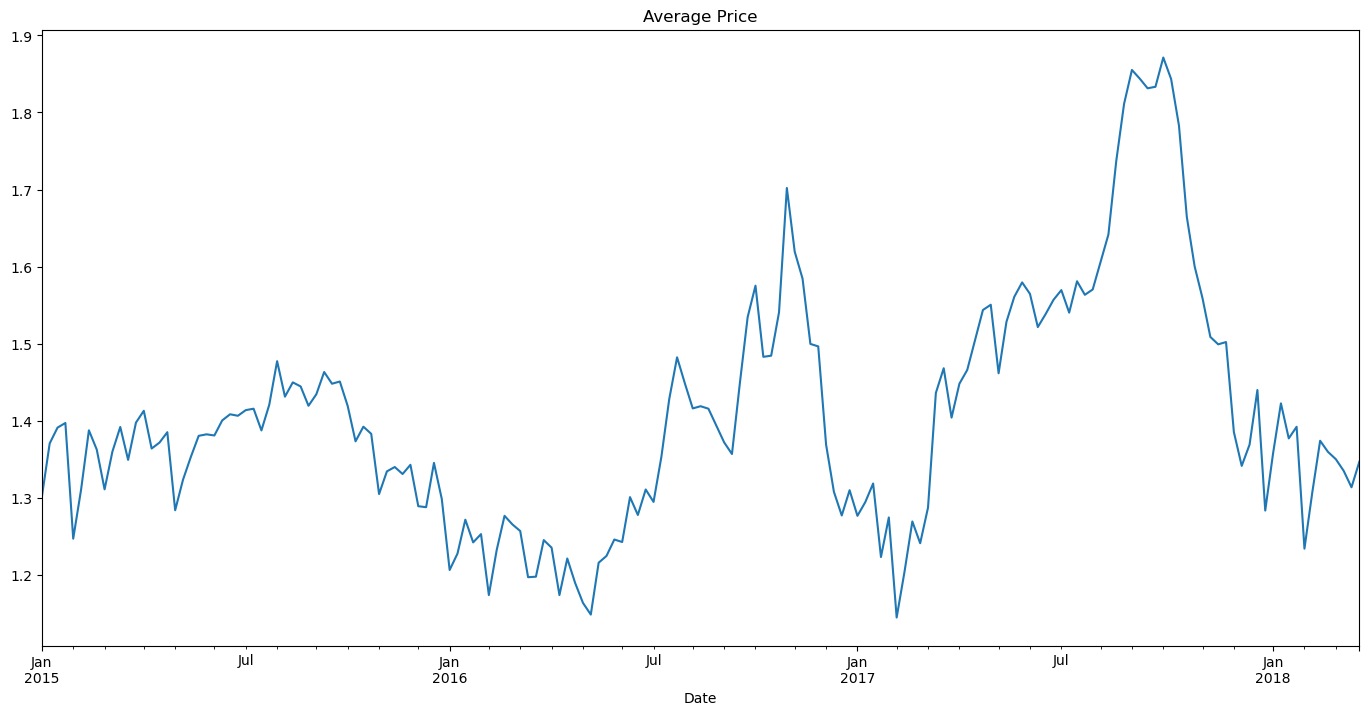

In [13]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price Per Month')

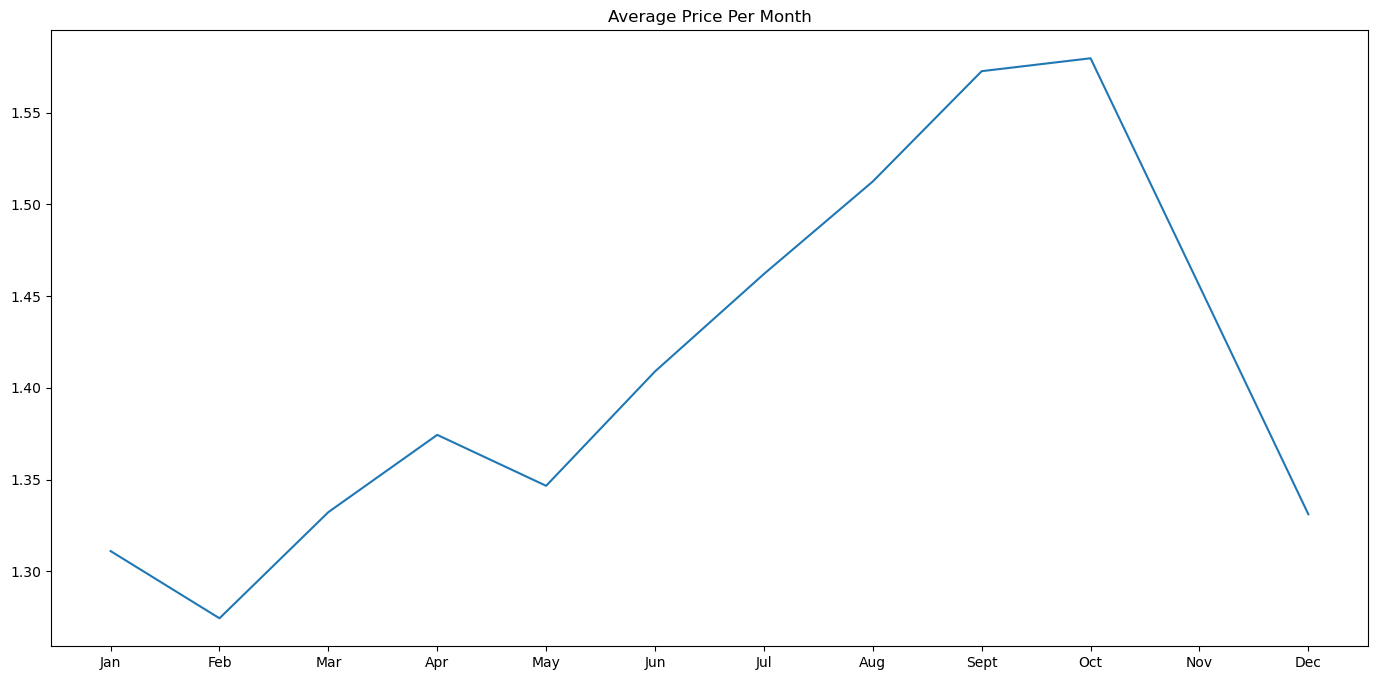

In [14]:
byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

Text(0.5, 1.0, 'Average Price Per Day')

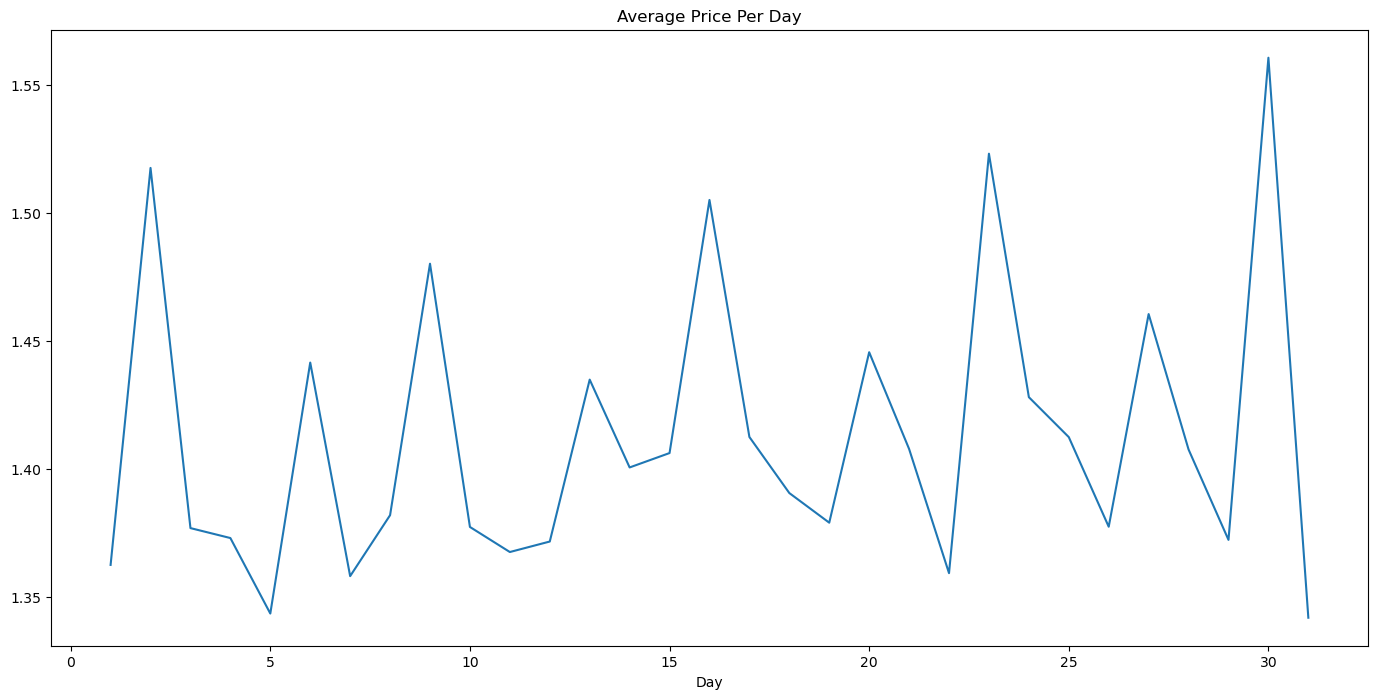

In [15]:
byDay = df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

Text(0.5, 1.0, 'Average Price According to Region')

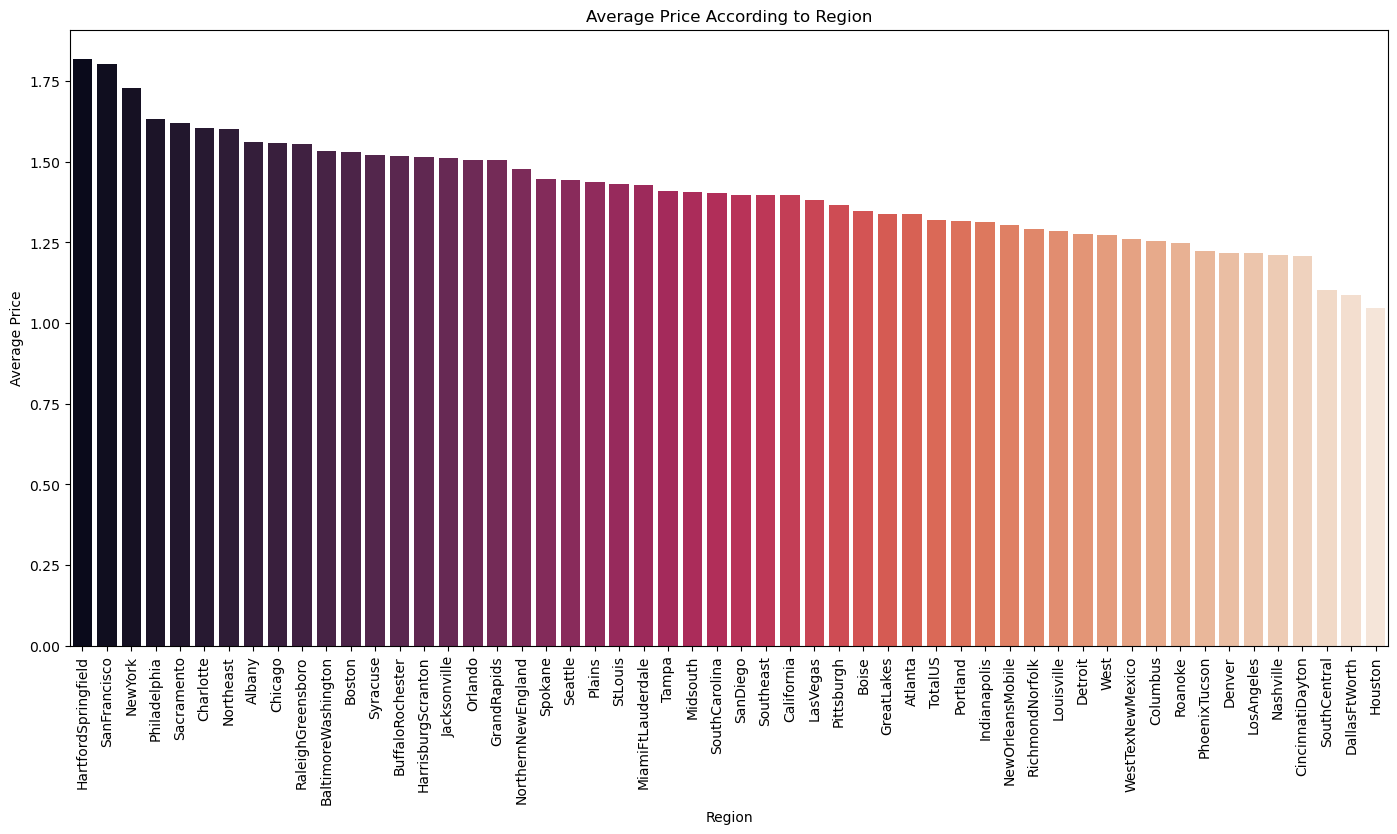

In [16]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

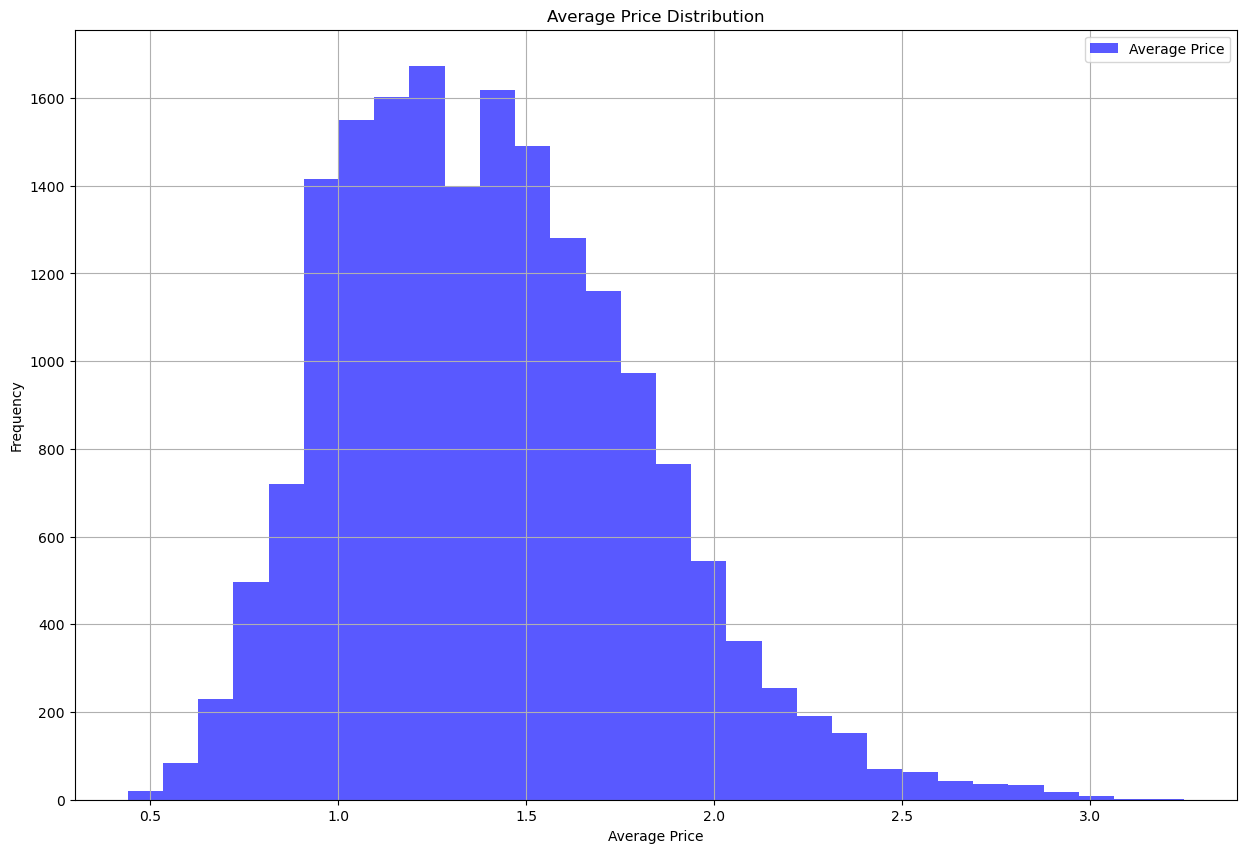

In [17]:
plt.figure(figsize=(15,10),dpi=100)
df["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

<Axes: >

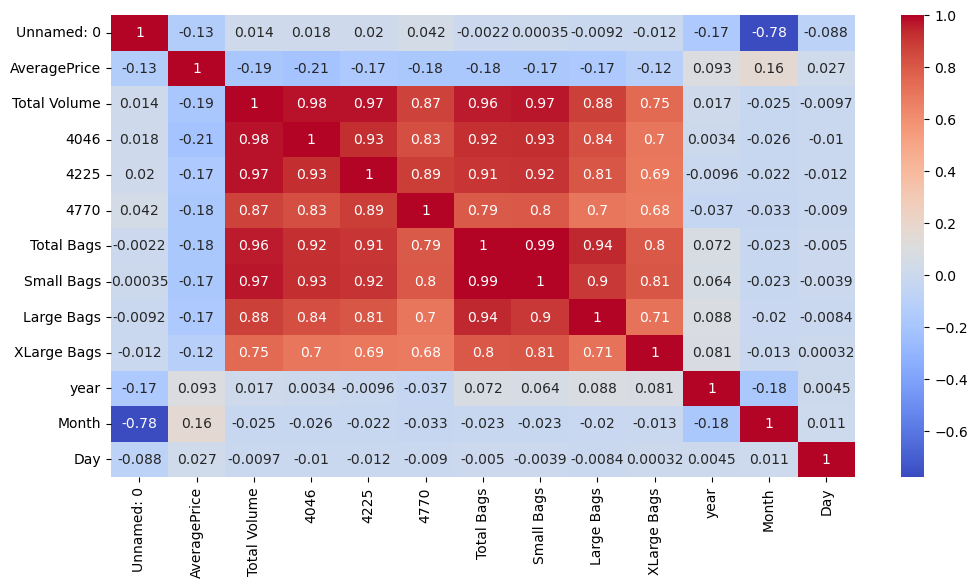

In [18]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [20]:
df_vif = df.copy()
df_vif.drop(columns=['Date','type','region'],inplace = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Xf = add_constant(df_vif)
pd.Series([variance_inflation_factor(Xf.values, i) 
               for i in range(Xf.shape[1])], 
              index=Xf.columns)

const           6.767191e+06
Unnamed: 0      3.464368e+00
AveragePrice    1.104576e+00
Total Volume    4.919762e+09
4046            6.600611e+08
4225            5.980690e+08
4770            4.763777e+06
Total Bags      2.370316e+14
Small Bags      1.364727e+14
Large Bags      1.448103e+13
XLarge Bags     7.622303e+10
year            1.467652e+00
Month           3.515864e+00
Day             1.023072e+00
dtype: float64